   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


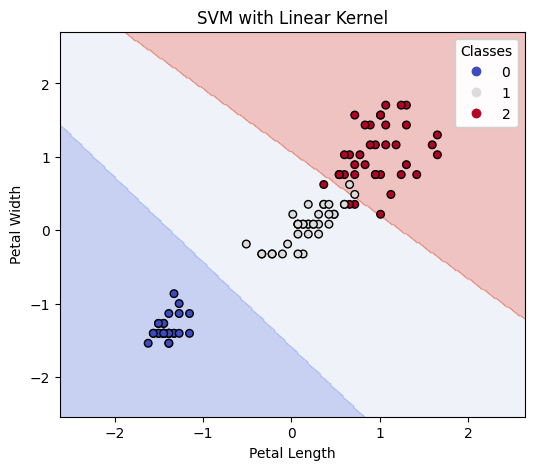

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv(r"C:\Users\3122215002038\Desktop\deeplearning\IRIS.csv")

print(df.head())


X = df[['petal_length', 'petal_width']].values
y = df['species'].factorize()[0]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

def plot_decision_boundaries(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    legend = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend)

plt.figure(figsize=(6, 5))
plot_decision_boundaries(X_train, y_train, svm_linear, 'SVM with Linear Kernel')
plt.show()


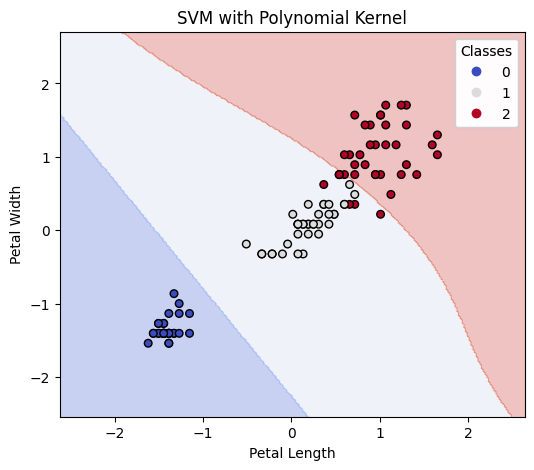

In [7]:
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly.fit(X_train, y_train)

plt.figure(figsize=(6, 5))
plot_decision_boundaries(X_train, y_train, svm_poly, 'SVM with Polynomial Kernel')
plt.show()


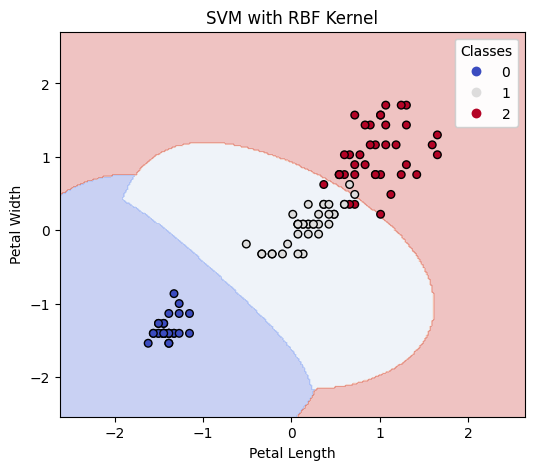

In [8]:
svm_rbf = SVC(kernel='rbf', C=1.0, random_state=42)
svm_rbf.fit(X_train, y_train)

plt.figure(figsize=(6, 5))
plot_decision_boundaries(X_train, y_train, svm_rbf, 'SVM with RBF Kernel')
plt.show()
